# Setup
## Environment

In [16]:
# libraries
import os
import sys
import inspect
import logging
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import register_matplotlib_converters

# directories
WDIR = f"{os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))}"
PDIR = os.path.dirname(WDIR)
sys.path.insert(0, WDIR)

from tardis import sorter
from tardis import time_machine
from tardis import viewer

# logging
logging.basicConfig(
    filename="monitor.log",
    filemode="w",
    format="%(asctime)s %(message)s",
    datefmt="%Y-%m-%d %H:%M",
    level=logging.INFO,
)
logger = logging.getLogger()

# quality-of-life
pd.set_option("display.expand_frame_repr", False)
plt.rcParams["figure.figsize"] = (16, 8)
plt.style.use("seaborn")
warnings.filterwarnings("ignore")
register_matplotlib_converters()

print(f"Completed: Environment Setup")

Completed: Environment Setup


# EDA

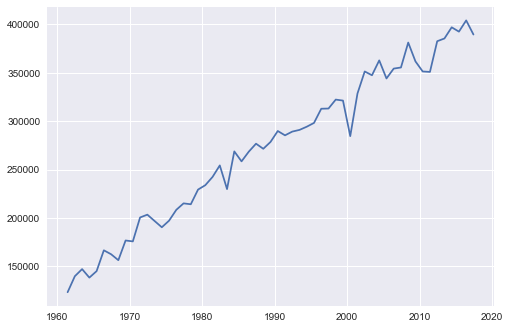

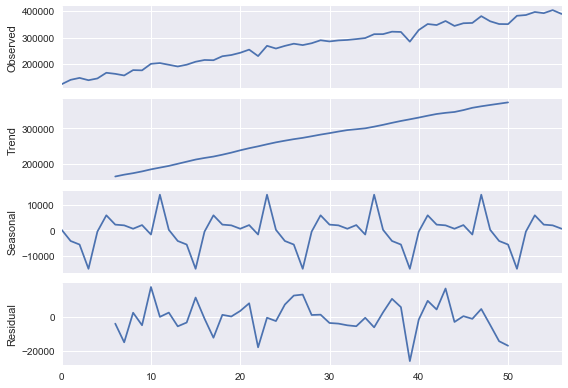

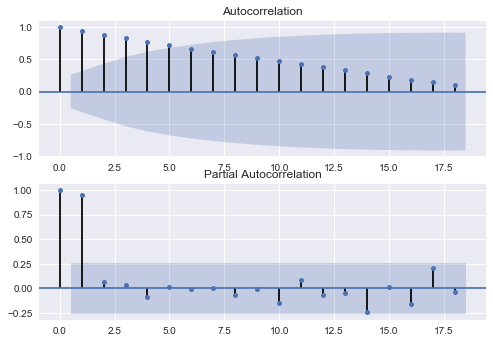

Completed: Time-series Analysis


In [17]:
# ETL
dt = pd.read_csv(f"{PDIR}/data/crops.csv", sep=",", encoding="cp1252")
df = sorter(dt, "Australia", "Potatoes")

# visualise
fig = plt.figure()
ax = plt.axes()
ax.plot(df["Year"], df["Value"])
plt.show()

# decomposition
ts = df[["Value"]]
dc = sm.tsa.seasonal_decompose(ts, model="additive", freq=12)
dv = dc.plot()

# auto-correlation
fig, ax = plt.subplots(2, 1)
ac = plot_acf(ts["Value"], ax=ax[0])
pc = plot_pacf(ts["Value"], ax=ax[1])
plt.show()

print(f"Completed: Time-series Analysis")

# Results
## Step-by-Step

                                 Statespace Model Results                                
Dep. Variable:                             Value   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 1)   Log Likelihood                -615.736
Date:                           Tue, 03 Mar 2020   AIC                           1239.472
Time:                                   14:44:38   BIC                           1247.502
Sample:                                        0   HQIC                          1242.577
                                            - 57                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1787      0.844     -0.212      0.832      -1.833       1.475
ma.L1          0.2585      0.809      0.319

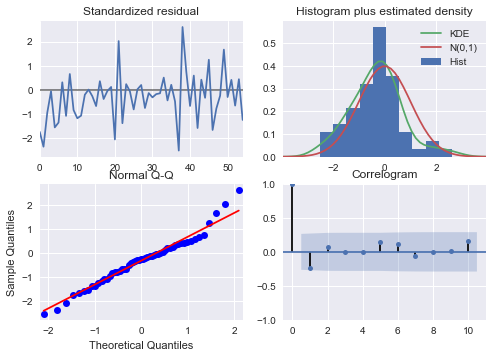

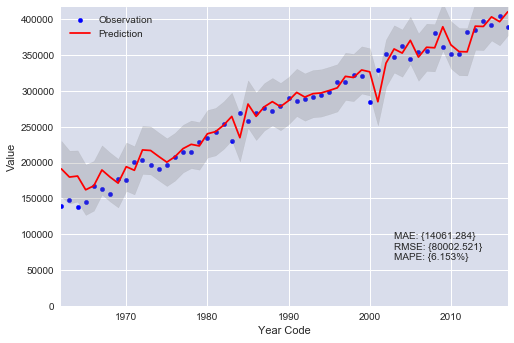

In [18]:
# predictions
predict_ci = time_machine(ts, start=0, s=1, dynamic=False)

# visualise
cb = df[["Year Code", "Value"]].merge(
    predict_ci, how="left", left_on=df.index, right_on=predict_ci.index
)
cb = cb.iloc[1:]
viewer(cb, predict_ci)

## From 1999

                                 Statespace Model Results                                
Dep. Variable:                             Value   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 1)   Log Likelihood                -615.736
Date:                           Tue, 03 Mar 2020   AIC                           1239.472
Time:                                   14:44:39   BIC                           1247.502
Sample:                                        0   HQIC                          1242.577
                                            - 57                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1787      0.844     -0.212      0.832      -1.833       1.475
ma.L1          0.2585      0.809      0.319

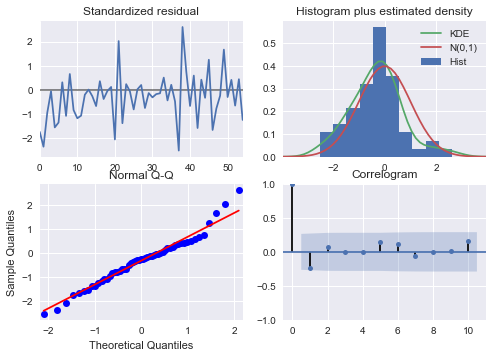

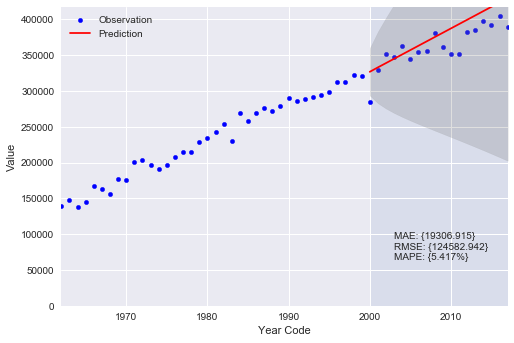

In [19]:
# predictions
predict_ci = time_machine(ts, start=39, s=1)

# visualise
cb = df[["Year Code", "Value"]].merge(
    predict_ci, how="left", left_on=df.index, right_on=predict_ci.index
)
cb = cb.iloc[1:]
viewer(cb, predict_ci)

## From 2000

                                 Statespace Model Results                                
Dep. Variable:                             Value   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 1)   Log Likelihood                -615.736
Date:                           Tue, 03 Mar 2020   AIC                           1239.472
Time:                                   14:44:41   BIC                           1247.502
Sample:                                        0   HQIC                          1242.577
                                            - 57                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1787      0.844     -0.212      0.832      -1.833       1.475
ma.L1          0.2585      0.809      0.319

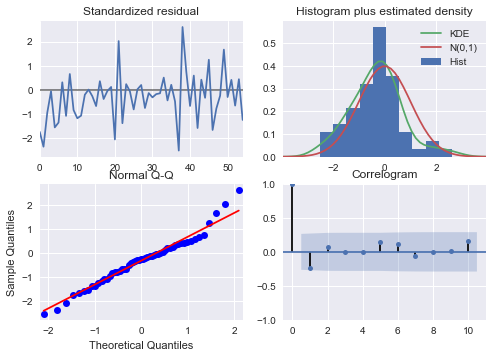

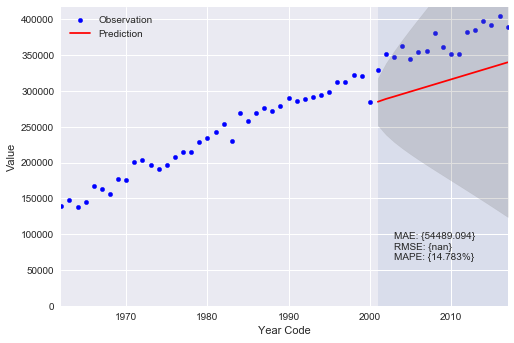

In [20]:
# predictions
predict_ci = time_machine(ts, start=40, s=1)

# visualise
cb = df[["Year Code", "Value"]].merge(
    predict_ci, how="left", left_on=df.index, right_on=predict_ci.index
)
cb = cb.iloc[1:]
viewer(cb, predict_ci)